# Duygu Analizi

In [1]:
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer

In [7]:
consumerKey="yourkey"
consumerSecret="yourkey"
accessToken="yourkey"
accessTokenSecret= "yourkey" 

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [8]:
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword,lang = "en").items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: coronavirus
Please enter how many tweets to analyze: 2000


In [9]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  519
negative number:  776
neutral number:  705


In [10]:
tweet_list

,0
0,RT @the_hindu: Uttar Pradesh Minister of State...
1,RT @Remroum: Just some of the things Israel ha...
2,RT @paulg: If it turns out that the coronaviru...
3,RT @WHO: Preliminary investigations conducted ...
4,RT @BrightCarbon: We are all well-adjusted to ...
...,...
1995,RT @trailerparkboys: Trailer Park Boys Public ...
1996,RT @LisaMarieBoothe: I often wonder how differ...
1997,RT @Beckett4Unite: More than fifty bus drivers...
1998,RT @MrsGandhi: With what face are you denying ...


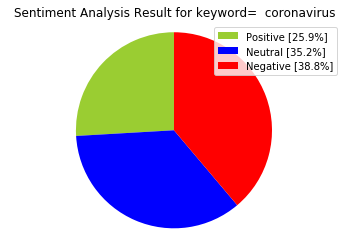

In [11]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [13]:
tweet_list.drop_duplicates(inplace = True)

In [14]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @the_hindu: Uttar Pradesh Minister of State...,RT @the_hindu: Uttar Pradesh Minister of State...
1,RT @Remroum: Just some of the things Israel ha...,RT @Remroum: Just some of the things Israel ha...
2,RT @paulg: If it turns out that the coronaviru...,RT @paulg: If it turns out that the coronaviru...
3,RT @WHO: Preliminary investigations conducted ...,RT @WHO: Preliminary investigations conducted ...
4,RT @BrightCarbon: We are all well-adjusted to ...,RT @BrightCarbon: We are all well-adjusted to ...
...,...,...
1968,RT @washingtonpost: Cuomo to receive $5.1 mill...,RT @washingtonpost: Cuomo to receive $5.1 mill...
1976,Covid19 Updates(INDIA)\n\nLast updated on : 19...,Covid19 Updates(INDIA)\n\nLast updated on : 19...
1980,Nevada GOP candidate for governor who hadn't b...,Nevada GOP candidate for governor who hadn't b...
1991,RT @TRTWorldNow: Covid-19 has killed over 3.4M...,RT @TRTWorldNow: Covid-19 has killed over 3.4M...


In [16]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @the_hindu: Uttar Pradesh Minister of State...,uttar pradesh minister of state for revenue a...
1,RT @Remroum: Just some of the things Israel ha...,just some of the things israel has bombed in ...
2,RT @paulg: If it turns out that the coronaviru...,if it turns out that the coronavirus did esca...
3,RT @WHO: Preliminary investigations conducted ...,preliminary investigations conducted by the c...
4,RT @BrightCarbon: We are all well-adjusted to ...,we are all well adjusted to wfh but how eff...
5,"RT @CandiceMalcolm: Meanwhile, in non-CBC land...",meanwhile in non cbc land one of the develo...
6,RT @mlambrecht: Beautiful new US Coronavirus V...,beautiful new us coronavirus vaccinations das...
7,RT @AskAnshul: The virus is not Chinese but it...,the virus is not chinese but its variant is i...
8,"RT @ndtv: Meerut Twins, 24, Caught Covid Day A...",meerut twins 24 caught covid day after birt...
10,RT @ReutersScience: A top medical organization...,a top medical organization has thrown its wei...


In [17]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @the_hindu: Uttar Pradesh Minister of State...,uttar pradesh minister of state for revenue a...,0.000000,0.000000,negative,0.167,0.833,0.000,-0.5574
1,RT @Remroum: Just some of the things Israel ha...,just some of the things israel has bombed in ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @paulg: If it turns out that the coronaviru...,if it turns out that the coronavirus did esca...,0.000000,0.000000,positive,0.000,0.879,0.121,0.2263
3,RT @WHO: Preliminary investigations conducted ...,preliminary investigations conducted by the c...,-0.012500,0.145833,positive,0.101,0.780,0.119,0.1027
4,RT @BrightCarbon: We are all well-adjusted to ...,we are all well adjusted to wfh but how eff...,0.600000,0.800000,positive,0.000,0.769,0.231,0.6908
5,"RT @CandiceMalcolm: Meanwhile, in non-CBC land...",meanwhile in non cbc land one of the develo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @mlambrecht: Beautiful new US Coronavirus V...,beautiful new us coronavirus vaccinations das...,0.328788,0.484848,positive,0.000,0.804,0.196,0.5994
7,RT @AskAnshul: The virus is not Chinese but it...,the virus is not chinese but its variant is i...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"RT @ndtv: Meerut Twins, 24, Caught Covid Day A...",meerut twins 24 caught covid day after birt...,0.000000,0.000000,negative,0.265,0.735,0.000,-0.5574
10,RT @ReutersScience: A top medical organization...,a top medical organization has thrown its wei...,0.033333,0.400000,negative,0.101,0.808,0.091,-0.0516


In [18]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [19]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [20]:
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,326,34.94
negative,312,33.44
positive,295,31.62


In [41]:
duygu_freq = tw_list.groupby("sentiment").count()["text"]

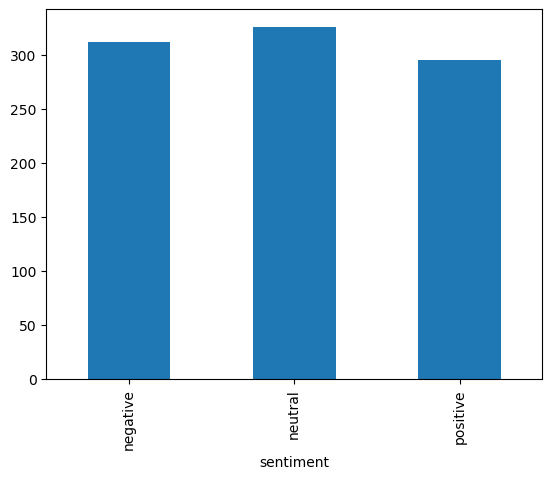

In [42]:
duygu_freq.plot.bar(x = "sentiment",y = "text");